In [1]:
import os
import pyrootutils
PROJECT_ROOT_DIR = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)
os.chdir(PROJECT_ROOT_DIR)

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde


from src.utils import _load_data_set
from src.utils_visualization import NotebookFigureSaver
from src.utils_performance import _get_performance_master_dict

CHAPTER_ID = "a_explore_data"
fig_saver = NotebookFigureSaver(CHAPTER_ID)

Saving figure data_set_Yoga_samples_10_classes_2


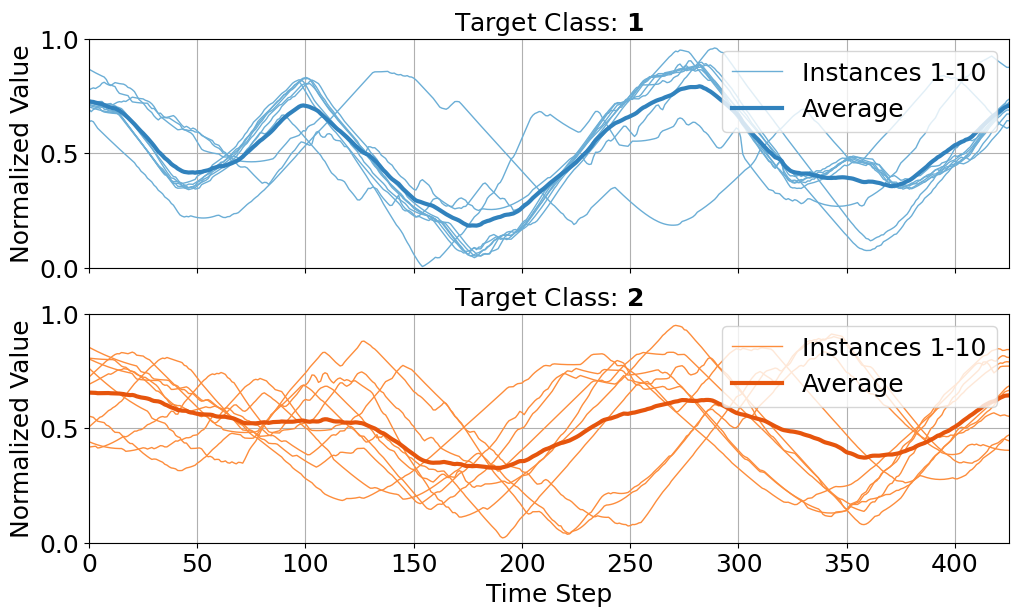

In [2]:
def _visualize_instances_per_target(
    data_set_name: str = "ArrowHead",
    n_samples_per_class: int = 5,
    max_number_classes: int = 5,
    save_figure: bool = False,
) -> None:
    """
    Generate a visualization of instances per target class in a dataset.

    Parameters:
        data_set_name (str): The name of the dataset to load. Default is "ArrowHead".
        n_samples_per_class (int): The number of samples to select from each target class. Default is 5.
        save_figure (bool): Whether to save the figure. Default is False.

    Returns:
        None
    """
    train_data, test_data = _load_data_set(
        data_set_name=data_set_name
    )

    classes = train_data["class_val"].unique()
    available_classes = len(classes)

    if available_classes > max_number_classes:
        classes = classes[:max_number_classes]

    cmap = matplotlib.colormaps.get_cmap("tab20c")  

    fig, axes = plt.subplots(
        len(classes), 1, figsize=(10, 6), sharex=True, sharey=True
    )

    for i, target_class in enumerate(sorted(classes)):
        # Filter the data for the current class
        class_data = train_data[train_data["class_val"] == target_class]

        if len(class_data) < n_samples_per_class:
            # If there are fewer instances in the class than n_samples_per_class, adjust
            n_samples_per_class = len(class_data)

        # Select n random samples from the target class
        class_samples = class_data.sample(n=n_samples_per_class)

        first_instance_in_class = True
        # Plot the selected time series on the corresponding subplot with the same color
        for idx, row in class_samples.iterrows():
            
            label = f"Instances 1-{n_samples_per_class}" if first_instance_in_class else ""
            first_instance_in_class = False
                
            axes[i].plot(
                row["dim_0"], color=cmap(4*i+1), alpha=1,  linewidth=1, label = label
            )  

        # Calculate and plot the average line for the class (bold line)
        average_line = class_samples["dim_0"].apply(lambda x: pd.Series(x)).mean(axis=0)
        axes[i].plot(
            average_line, color=cmap(4*i), linewidth=3, label="Average", alpha=1
        )  

        axes[i].set_title(f"Target Class: " + r"$\bf{" + str(target_class) + "}$", fontsize=18, loc="center")

        if i == len(classes) - 1:
            axes[i].set_xlabel("Time Step")
        axes[i].set_ylabel("Normalized Value", fontsize=18)
        axes[i].legend(loc="upper right",fontsize=18)
        axes[i].set_xlim(row["dim_0"].index.min(), row["dim_0"].index.max())
        axes[i].set_ylim(0, 1)
        axes[i].set_yticks([0, 0.5, 1])
        axes[i].tick_params(axis="x", labelsize=18) 
        axes[i].tick_params(axis="y", labelsize=18) 
        axes[i].grid(True)

        if i >= max_number_classes:
            break

    plt.xlabel("Time Step", fontsize=18)
    plt.subplots_adjust(hspace=.2, wspace=0., left=0.08, right=1., bottom=0.11, top=.95) 
    if save_figure:
        fig_saver.save_fig(
            f"data_set_{data_set_name}_samples_{n_samples_per_class}_classes_{max_number_classes}"
        )
    plt.show()


_visualize_instances_per_target(
    data_set_name="Yoga",
    n_samples_per_class=10,
    max_number_classes=2,
    save_figure=True,
)

Saving figure data_set_Yoga_performance_distributions_6_algorithms


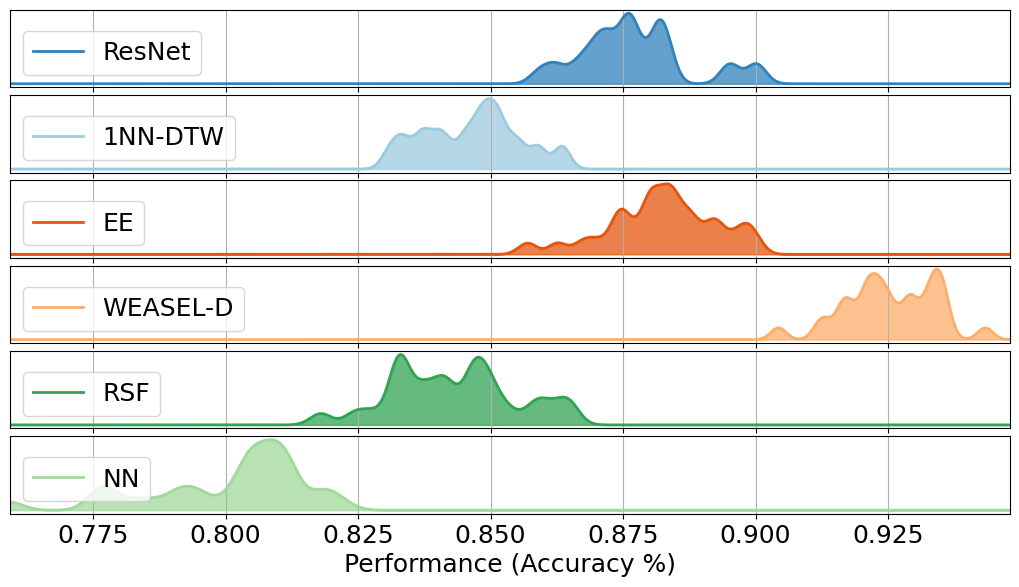

In [3]:
def plot_performance_distributions_matplotlib(data, number_algorithms):
    """
    Plots the performance distributions of different algorithms using Matplotlib.

    This function creates a series of subplots, each displaying the kernel density estimation (KDE)
    of the performance distribution for a given algorithm. The plots are arranged
    vertically, sharing the x-axis, which represents performance values.
    
    Parameters:
    - data (dict): A dictionary where keys are algorithm names and values are lists or arrays of
      performance values (e.g., accuracy percentages) for those algorithms.
    - number_algorithms (int): The number of algorithms to include in the plot. This parameter
      determines the number of subplots generated.
    """
    
    # Determine the overall range of performance values
    x_min, x_max = data.min().min(), data.max().max()
    x_range = np.linspace(x_min, x_max, 500)

    # Create a figure with subplots
    cmap = matplotlib.colormaps.get_cmap("tab20c")
    fig, axes = plt.subplots(number_algorithms, 1, figsize=(10, 6), sharex=True)

    # Ensure axes is an array even if there's only one plot
    if number_algorithms == 1:
        axes = [axes]

    # Iterate over algorithms
    for i, (algorithm_name, performance) in enumerate(data.items()):
        if i >= number_algorithms:
            break

        # Compute KDE
        kde = gaussian_kde(performance)
        kde.set_bandwidth(bw_method=kde.factor / 3.)
        
        kde_values = kde(x_range)

        # Plot KDE on the corresponding axes
        ax = axes[i]
        color = cmap(i*2)
        ax.plot(x_range, kde_values, lw=2, color=color, label=algorithm_name.strip("_ACC"))
        ax.fill_between(x_range, kde_values, alpha=0.75, color=color)
        ax.legend(loc='lower left', fontsize=18)
        # ax.set_ylabel(algorithm_name.strip("_ACC"), fontsize=10)
        ax.set_ylabel("")
        ax.set_yticks([])
        ax.set_xlim([x_min, x_max])
        ax.grid(True)
    
    # Set labels and titles
    plt.xlabel("Performance (Accuracy %)", fontsize=18)
    plt.xticks(fontsize=18)
    
    # Adjust layout
    plt.subplots_adjust(hspace=.1, wspace=0., left=0., right=1., bottom=0.11, top=.95) 
    
    fig_saver.save_fig(
            f"data_set_{data_set_name}_performance_distributions_{number_algorithms}_algorithms"
        )
    plt.show()

data_set_name = "Yoga"
number_algorithms = 6
performance_dict = _get_performance_master_dict()
data_set_performance = performance_dict[data_set_name]
plot_performance_distributions_matplotlib(data_set_performance, number_algorithms)